In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

Let's read the excel file with available data gathered during the survey in Kyrgyz Republic in 2013. This research was made in order to determine the risk factors of occurrence of cardiovascular disease.
These are survey results so some columns have answers like 'yes' or 'no' which are encoded as 1 and 2 respectively. Further I am going to change 2 to 0 for the sake of consistency. 

After consultation with a specialist I came up with the main information columns I should extract from the file:

1) diastolic and systolic pressure measurements

2) cholesterol and sugar measurements

3) information about smoking

4) waist circumference measurement

5) information about drinking

6) heart disease occurrence which is a target

7) info about sault overdose

8) info about fruit and vegetables consumption

9) year of birth

10) gender


In [2]:
df=pd.read_excel('Steps_End.xlsx',sheet_name='Лист1')

In [3]:
df.head()

pid     i1   i2     i3   i4b   i4a     i4c   i5   i6   i7a  ...   b3  \
0  202014.0  202.0  202  102.0  10.0  28.0  2013.0  1.0  1.0  11.0  ...  1.0   
1  202001.0  202.0  202  102.0  10.0  28.0  2013.0  1.0  1.0  12.0  ...  1.0   
2  202002.0  202.0  202  102.0  10.0  28.0  2013.0  1.0  1.0  18.0  ...  1.0   
3  202003.0  202.0  202  102.0  10.0  28.0  2013.0  1.0  1.0  20.0  ...  1.0   
4  202005.0  202.0  202  102.0  10.0  29.0  2013.0  1.0  1.0  14.0  ...  1.0   

   b4a   b4b   b5  b5er   b6   b7   b8  b8er   b9  
0  8.0  38.0  5.4   0.0  2.0  1.0  4.3   0.0  2.0  
1  8.0  43.0  5.2   0.0  2.0  1.0  4.2   0.0  2.0  
2  8.0  59.0  3.7   0.0  2.0  1.0  4.6   0.0  2.0  
3  9.0   2.0  6.1   0.0  2.0  1.0  6.5   0.0  2.0  
4  8.0  47.0  4.8   0.0  2.0  1.0  5.0   0.0  2.0  

[5 rows x 316 columns]

The column names are encoded. I have the dictionary with all the codes and I will grab only the columns with information I need for the analysis and machine learning.

In [4]:
heart=df[['c1','c2c','t1','m5a','m5b','m6a','m6b','m11','b5','b8','h17','h18','h19','p16a','p16b','m12','ds1','a9','d2','d4','m14','t9']]

In [5]:
heart=heart.rename(columns={'c1':'gender','c2c':'birth year','t1':'smoking','m5a':'2nd systolic pressure','m5b':'2nd diastolic pressure','m6a':'3rd systolic pressure','m6b':'3rd diastolic pressure','m11':'height','b5':'sugar','b8':'cholesterol','m12':'weight','ds1':'sault overdose','a9':'6+ doses of alcohol taken at a time for the last 30 days ','d2':'portions of fruit per day','d4':'portions of vegetables per day','m14':'waist circumference','t9':'smoked before'})

In [6]:
heart.head()

gender  birth year  smoking  2nd systolic pressure  2nd diastolic pressure  \
0     1.0      1984.0      1.0                  118.0                    80.0   
1     2.0      1975.0      2.0                  128.0                    86.0   
2     2.0      1976.0      2.0                  112.0                    71.0   
3     2.0      1954.0      2.0                  160.0                    86.0   
4     2.0      1973.0      2.0                  135.0                    80.0   

   3rd systolic pressure  3rd diastolic pressure  height  sugar  cholesterol  \
0                  126.0                    84.0   172.0    5.4          4.3   
1                  130.0                    85.0   163.0    5.2          4.2   
2                  119.0                    74.0   161.0    3.7          4.6   
3                  154.0                    85.0   168.0    6.1          6.5   
4                  128.0                    82.0   172.0    4.8          5.0   

   ...  h19  p16a  p16b  weight  sault overdose  \
0  ...  2.0   3.0   0.0    70.0             3.0   
1  ...  2.0   5.0   0.0    72.0             2.0   
2  ...  2.0   4.0   0.0    58.0             2.0   
3  ...  2.0   3.0   0.0    92.0             1.0   
4  ...  2.0   3.0   0.0    89.0             2.0   

   6+ doses of alcohol taken at a time for the last 30 days   \
0                                                1.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   portions of fruit per day  portions of vegetables per day  \
0                        2.0                             2.0   
1                        3.0                             3.0   
2                        3.0                             3.0   
3                        2.0                             2.0   
4                        2.0                             3.0   

   waist circumference  smoked before  
0                 77.0            2.0  
1                 85.0            2.0  
2                 70.0            NaN  
3                123.0            NaN  
4                 89.0            2.0  

[5 rows x 22 columns]

In [7]:
heart.columns

Index(['gender', 'birth year', 'smoking', '2nd systolic pressure',
       '2nd diastolic pressure', '3rd systolic pressure',
       '3rd diastolic pressure', 'height', 'sugar', 'cholesterol', 'h17',
       'h18', 'h19', 'p16a', 'p16b', 'weight', 'sault overdose',
       '6+ doses of alcohol taken at a time for the last 30 days ',
       'portions of fruit per day', 'portions of vegetables per day',
       'waist circumference', 'smoked before'],
      dtype='object')

Columns 'h17-h19' represent information concerning heart disease presense. The information is whether the person felt pain in chest in the past, whether the person currently takes aspirin for heart and whether the person takes statins. I am going to make one column out of these three and make it the target column.

In [8]:
hd=[]
for i in range (0,len(heart['h17'])):
    
    if ((heart['h17'][i]==1)|(heart['h18'][i]==1)|(heart['h19'][i]==1)):
        hd.append(1)
    else:
        hd.append(0)
heart['heart disease occurrence']=hd  
del heart['h17'],heart['h18'],heart['h19']

In [9]:
heart.head()

gender  birth year  smoking  2nd systolic pressure  2nd diastolic pressure  \
0     1.0      1984.0      1.0                  118.0                    80.0   
1     2.0      1975.0      2.0                  128.0                    86.0   
2     2.0      1976.0      2.0                  112.0                    71.0   
3     2.0      1954.0      2.0                  160.0                    86.0   
4     2.0      1973.0      2.0                  135.0                    80.0   

   3rd systolic pressure  3rd diastolic pressure  height  sugar  cholesterol  \
0                  126.0                    84.0   172.0    5.4          4.3   
1                  130.0                    85.0   163.0    5.2          4.2   
2                  119.0                    74.0   161.0    3.7          4.6   
3                  154.0                    85.0   168.0    6.1          6.5   
4                  128.0                    82.0   172.0    4.8          5.0   

   p16a  p16b  weight  sault overdose  \
0   3.0   0.0    70.0             3.0   
1   5.0   0.0    72.0             2.0   
2   4.0   0.0    58.0             2.0   
3   3.0   0.0    92.0             1.0   
4   3.0   0.0    89.0             2.0   

   6+ doses of alcohol taken at a time for the last 30 days   \
0                                                1.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   portions of fruit per day  portions of vegetables per day  \
0                        2.0                             2.0   
1                        3.0                             3.0   
2                        3.0                             3.0   
3                        2.0                             2.0   
4                        2.0                             3.0   

   waist circumference  smoked before  heart disease occurrence  
0                 77.0            2.0                         1  
1                 85.0            2.0                         1  
2                 70.0            NaN                         0  
3                123.0            NaN                         1  
4                 89.0            2.0                         0

'p16a' and 'p16b' represent amount of time spent lying or sitting in hours and minutes respectively. I am going to unite these columns too. First let's see what values are for hours measure.

In [10]:
heart['p16a'].value_counts()

2.0     651
3.0     452
1.0     364
4.0     359
5.0     219
6.0     168
8.0     118
0.0      71
7.0      68
9.0      52
10.0     47
12.0     37
16.0     11
11.0     10
13.0      5
77.0      4
14.0      2
15.0      2
Name: p16a, dtype: int64

There is 77 because in this survey 77 stands for 'I don't know'. Instead of 77 I will assign the mean of this dataset.

In [11]:
def replace(x):
    if x ==77:
        return heart['p16a'].mean()
    else:
        return x
heart['p16a']=heart['p16a'].apply(lambda x:replace(x))  
heart['rest time']=heart['p16a']+heart['p16b'].apply(lambda x:x/60)

In [12]:
del heart['p16a'],heart['p16b']

There are 4 columns for pressure measurements. It is common to take the average of the second and third measurement.

In [13]:
heart['diastolic pressure']=(heart['2nd diastolic pressure']+heart['3rd diastolic pressure'])/2
heart['systolic pressure']=(heart['2nd systolic pressure']+heart['3rd systolic pressure'])/2
del heart['2nd diastolic pressure'],heart['3rd diastolic pressure'],heart['2nd systolic pressure'],heart['3rd systolic pressure']

In [14]:
heart.head()

gender  birth year  smoking  height  sugar  cholesterol  weight  \
0     1.0      1984.0      1.0   172.0    5.4          4.3    70.0   
1     2.0      1975.0      2.0   163.0    5.2          4.2    72.0   
2     2.0      1976.0      2.0   161.0    3.7          4.6    58.0   
3     2.0      1954.0      2.0   168.0    6.1          6.5    92.0   
4     2.0      1973.0      2.0   172.0    4.8          5.0    89.0   

   sault overdose  6+ doses of alcohol taken at a time for the last 30 days   \
0             3.0                                                1.0           
1             2.0                                                0.0           
2             2.0                                                0.0           
3             1.0                                                0.0           
4             2.0                                                0.0           

   portions of fruit per day  portions of vegetables per day  \
0                        2.0                             2.0   
1                        3.0                             3.0   
2                        3.0                             3.0   
3                        2.0                             2.0   
4                        2.0                             3.0   

   waist circumference  smoked before  heart disease occurrence  rest time  \
0                 77.0            2.0                         1        3.0   
1                 85.0            2.0                         1        5.0   
2                 70.0            NaN                         0        4.0   
3                123.0            NaN                         1        3.0   
4                 89.0            2.0                         0        3.0   

   diastolic pressure  systolic pressure  
0                82.0              122.0  
1                85.5              129.0  
2                72.5              115.5  
3                85.5              157.0  
4                81.0              131.5

Let's unite two smoking related columns.

In [15]:
heart['smoked before']=heart['smoked before'].fillna(0)
smoke=[]
for i in range(0,len(heart['smoking'])):
    if (heart['smoking'][i]==1) | (heart['smoked before'][i]==1):
        smoke.append(1)
    else:
        smoke.append(0)
del heart['smoking'],heart['smoked before']     
heart['smoking']=smoke



In [16]:
heart.head()

gender  birth year  height  sugar  cholesterol  weight  sault overdose  \
0     1.0      1984.0   172.0    5.4          4.3    70.0             3.0   
1     2.0      1975.0   163.0    5.2          4.2    72.0             2.0   
2     2.0      1976.0   161.0    3.7          4.6    58.0             2.0   
3     2.0      1954.0   168.0    6.1          6.5    92.0             1.0   
4     2.0      1973.0   172.0    4.8          5.0    89.0             2.0   

   6+ doses of alcohol taken at a time for the last 30 days   \
0                                                1.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   portions of fruit per day  portions of vegetables per day  \
0                        2.0                             2.0   
1                        3.0                             3.0   
2                        3.0                             3.0   
3                        2.0                             2.0   
4                        2.0                             3.0   

   waist circumference  heart disease occurrence  rest time  \
0                 77.0                         1        3.0   
1                 85.0                         1        5.0   
2                 70.0                         0        4.0   
3                123.0                         1        3.0   
4                 89.0                         0        3.0   

   diastolic pressure  systolic pressure  smoking  
0                82.0              122.0        1  
1                85.5              129.0        0  
2                72.5              115.5        0  
3                85.5              157.0        0  
4                81.0              131.5        0

Let's introduce body max index column. But first I have to fill missing values in height and weight columns.

In [17]:
weight_new=[]
for i in range(0,len(heart['gender'])):
    if np.isnan(heart['weight'][i]):
        if heart['gender'][i]==1:
            weight_new.append(76.93154008438819)
        else:
             weight_new.append(70.19869807811534)
    else:
        weight_new.append(heart['weight'][i])
del heart['weight'] 
heart['weight']=weight_new

In [18]:
height_new=[]
for i in range(0,len(heart['gender'])):
    if np.isnan(heart['height'][i]):
        if heart['gender'][i]==1:
            height_new.append(169.81402953586502)
        else:
             height_new.append(158.19944203347796)
    else:
        height_new.append(heart['height'][i])
del heart['height'] 
heart['height']=height_new

So I replaced missing values with averages for men and women of this dataset. Now let's create body mass index column

In [19]:
heart['body mass index']=(heart['weight'])/((heart['height']/100)**2)

Let's also add age column. Birth year column has nan values too, I didn't think of anything better than replace them with averages of this dataset.

In [20]:
heart['birth year']=heart['birth year'].fillna(1969)
heart['age']=2013-heart['birth year']

Let's have gender column as 1 and 0 too for the sake of consistency of dataset. 1 will stand for male and 0 for female.

In [21]:
def gen(x):
    if x==2:
        return 0
    else:
        return 1
heart['gender']=heart['gender'].apply(lambda x:gen(x))    

In [22]:
print(heart['sugar'].isnull().value_counts())
print(heart['cholesterol'].isnull().value_counts())
print(heart['sault overdose'].isnull().value_counts())
print(heart['6+ doses of alcohol taken at a time for the last 30 days '].isnull().value_counts())
print(heart['portions of fruit per day'].isnull().value_counts())
print(heart['portions of vegetables per day'].isnull().value_counts())
print(heart['waist circumference'].isnull().value_counts())
print(heart['diastolic pressure'].isnull().value_counts())
print(heart['systolic pressure'].isnull().value_counts())

False    2585
True       87
Name: sugar, dtype: int64
False    2600
True       72
Name: cholesterol, dtype: int64
False    2640
True       32
Name: sault overdose, dtype: int64
True     1989
False     683
Name: 6+ doses of alcohol taken at a time for the last 30 days , dtype: int64
False    2610
True       62
Name: portions of fruit per day, dtype: int64
False    2611
True       61
Name: portions of vegetables per day, dtype: int64
False    2561
True      111
Name: waist circumference, dtype: int64
False    2633
True       39
Name: diastolic pressure, dtype: int64
False    2633
True       39
Name: systolic pressure, dtype: int64


Unfortunately all left columns have nan values somewhere.

In [23]:
heart['sugar']=heart['sugar'].fillna(heart['sugar'].mean())
heart['cholesterol']=heart['cholesterol'].fillna(heart['cholesterol'].mean())
heart['sault overdose']=heart['sault overdose'].fillna(heart['sault overdose'].mean())
heart['6+ doses of alcohol taken at a time for the last 30 days ']=heart['6+ doses of alcohol taken at a time for the last 30 days '].fillna(heart['6+ doses of alcohol taken at a time for the last 30 days '].mean())
heart['portions of fruit per day']=heart['portions of fruit per day'].fillna(heart['portions of fruit per day'].mean())
heart['portions of vegetables per day']=heart['portions of vegetables per day'].fillna(heart['portions of vegetables per day'].mean())
heart['waist circumference']=heart['waist circumference'].fillna(heart['waist circumference'].mean())
heart['diastolic pressure']=heart['diastolic pressure'].fillna(heart['diastolic pressure'].mean())
heart['systolic pressure']=heart['systolic pressure'].fillna(heart['systolic pressure'].mean())

In [24]:
heart['rest time']=heart['rest time'].fillna(heart['rest time'].mean())

Let's also replace 77 everywhere if they are there. 

In [25]:
def replace(x):
    s=[]
    for i in range(0,len(x)):
        if x[i] ==77:
            s.append(x.mean())
        else:
            s.append(x[i])
    return s        
heart['sault overdose']=replace(heart['sault overdose'])
heart['portions of fruit per day']=replace(heart['portions of fruit per day'])
heart['portions of vegetables per day']=replace(heart['portions of vegetables per day'])
heart['6+ doses of alcohol taken at a time for the last 30 days ']=replace(heart['6+ doses of alcohol taken at a time for the last 30 days '])

There are two cases of men weighing 350 kg which I am going to exclude from dataset

In [26]:
heart=heart.drop(heart.index[182])
heart=heart.drop(heart.index[1455])

Looks like we are done with preparing the data. Now let's analyze it. Reminder that in case of smoking 0 stands for non-smokers and 1 otherwise. 0 stands for women and 1 for men.

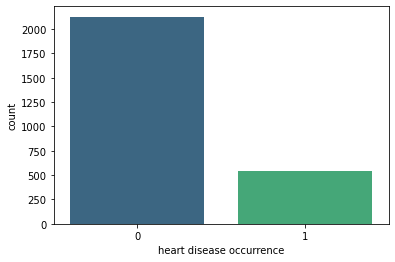

In [27]:
sns.countplot(x='heart disease occurrence',data=heart,palette='viridis')

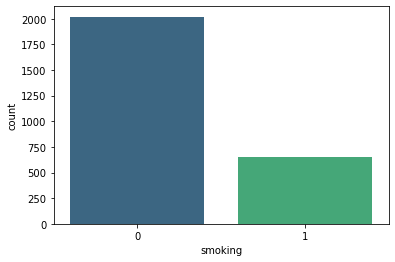

In [28]:
sns.countplot(x='smoking',data=heart,palette='viridis')

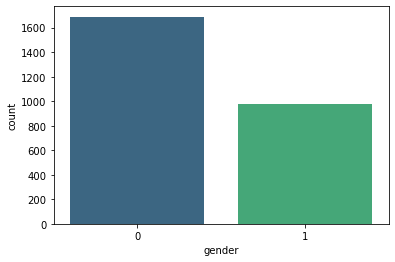

In [29]:
sns.countplot(x='gender',data=heart,palette='viridis')

Text(0, 0.5, 'Frequency')

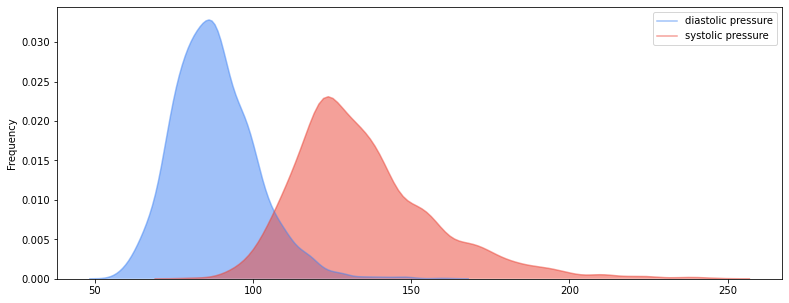

In [30]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart['diastolic pressure'], alpha=0.5,shade = True, color="#4285f4")
sns.kdeplot(heart['systolic pressure'], alpha=0.5,shade = True, color="#ea4335")

ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

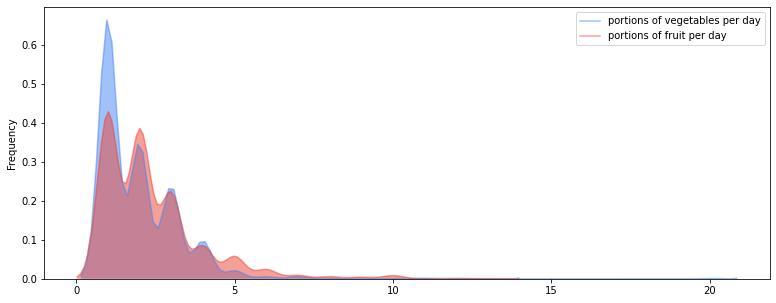

In [31]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart['portions of vegetables per day'], alpha=0.5,shade = True, color="#4285f4")
sns.kdeplot(heart['portions of fruit per day'], alpha=0.5,shade = True, color="#ea4335")

ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

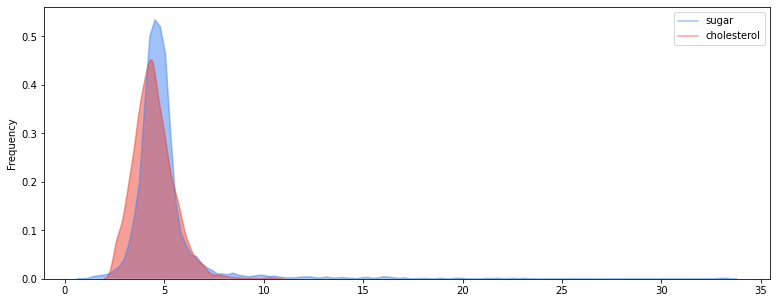

In [32]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart['sugar'], alpha=0.5,shade = True, color="#4285f4")
sns.kdeplot(heart['cholesterol'], alpha=0.5,shade = True, color="#ea4335")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

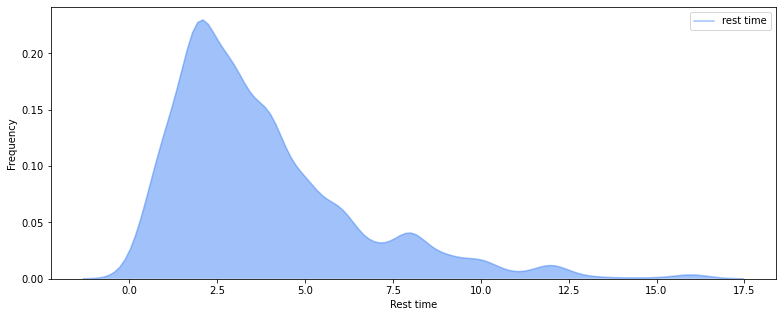

In [33]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart['rest time'], alpha=0.5,shade = True, color="#4285f4")
ax.set_xlabel("Rest time")
ax.set_ylabel("Frequency")

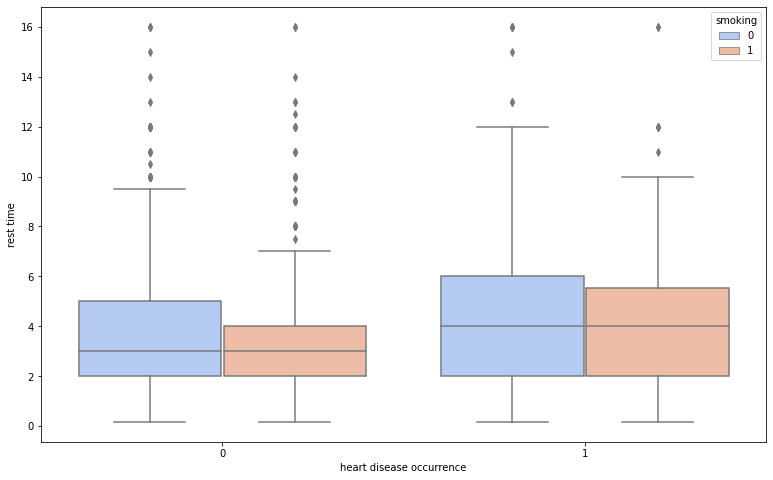

In [34]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='rest time',hue='smoking',data=heart, palette="coolwarm")

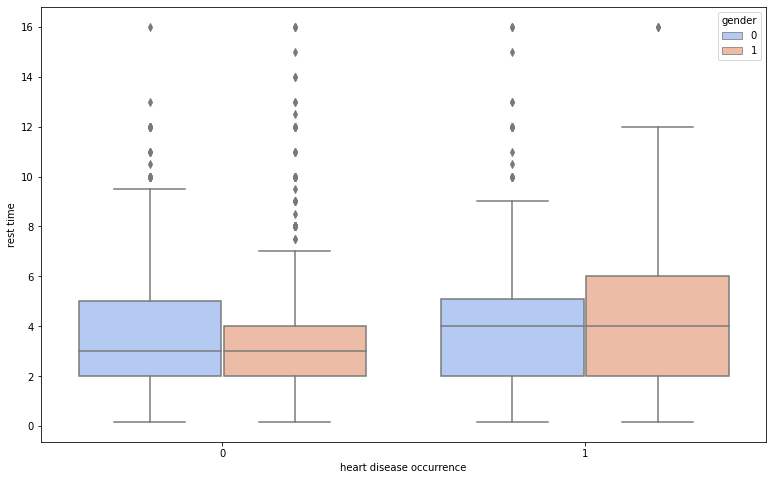

In [52]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='rest time',hue='gender',data=heart, palette="coolwarm")

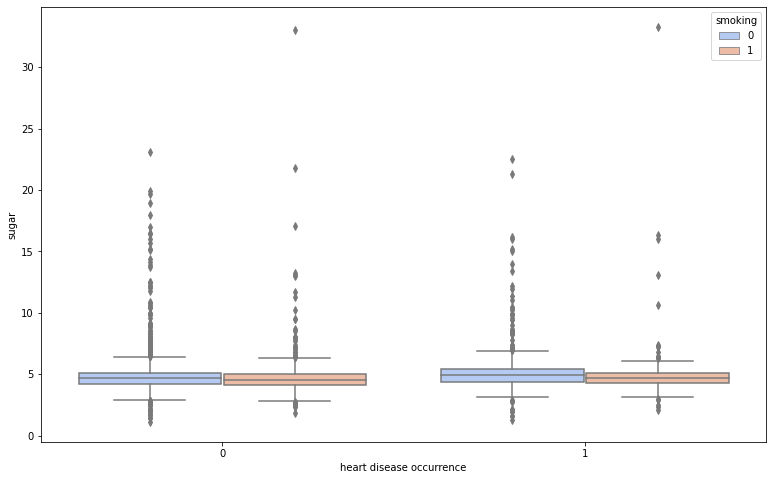

In [53]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='sugar',hue='smoking',data=heart, palette="coolwarm")

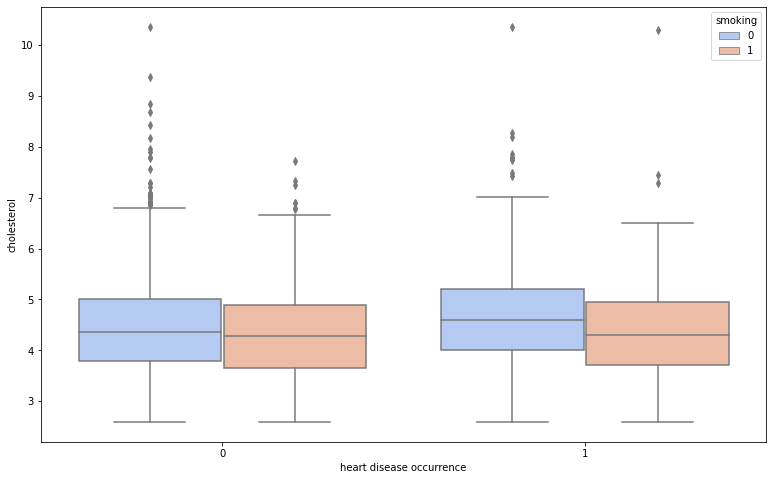

In [54]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='cholesterol',hue='smoking',data=heart, palette="coolwarm")

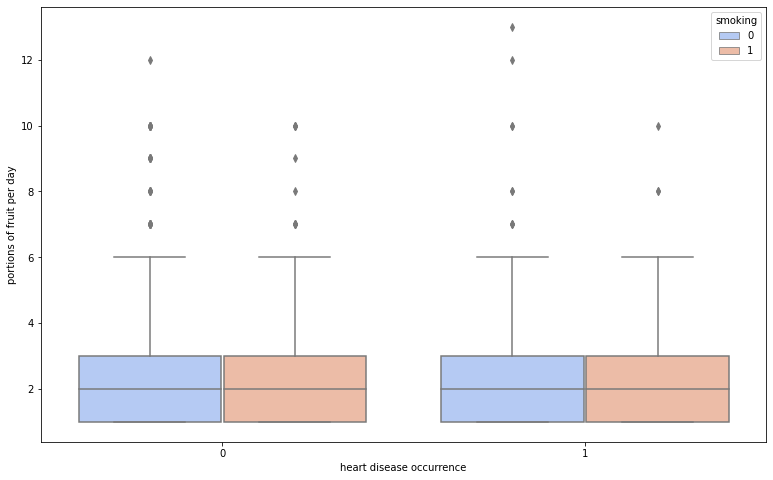

In [55]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='portions of fruit per day',hue='smoking',data=heart, palette="coolwarm")

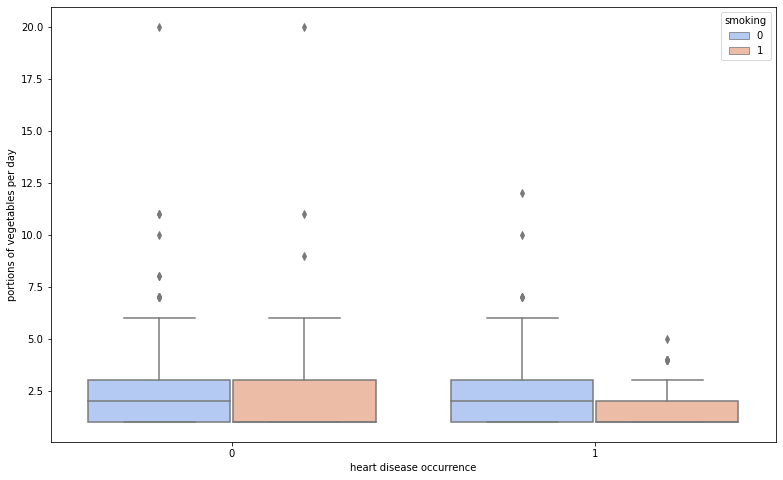

In [56]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='portions of vegetables per day',hue='smoking',data=heart, palette="coolwarm")

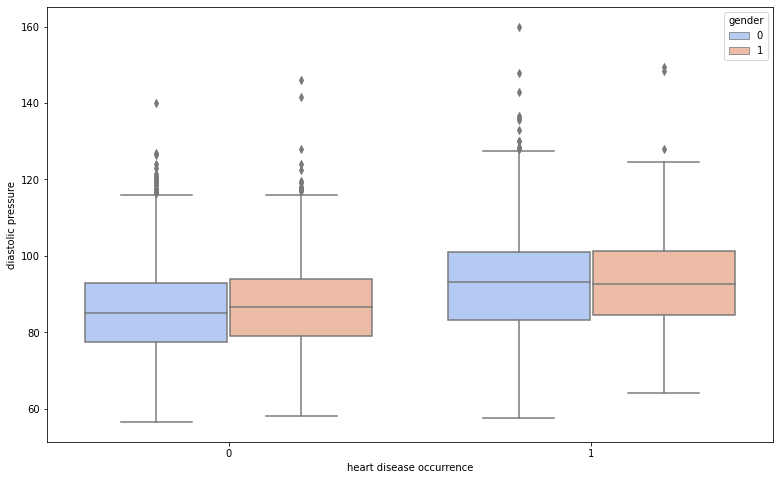

In [57]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='diastolic pressure',hue='gender',data=heart, palette="coolwarm")

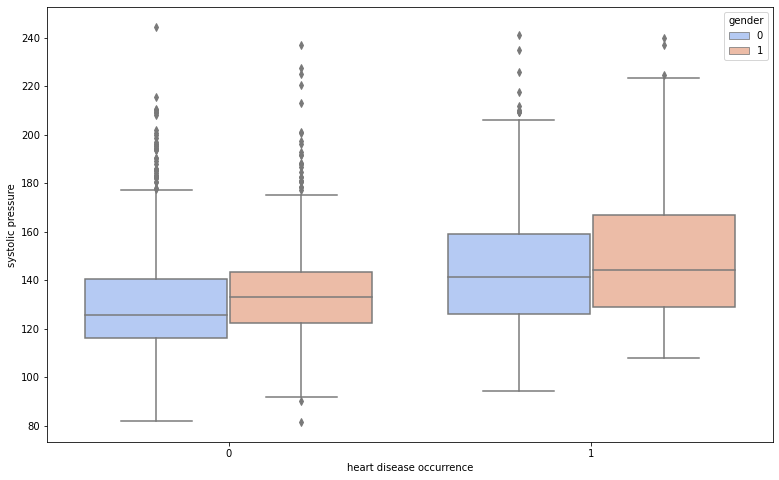

In [58]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='systolic pressure',hue='gender',data=heart, palette="coolwarm")

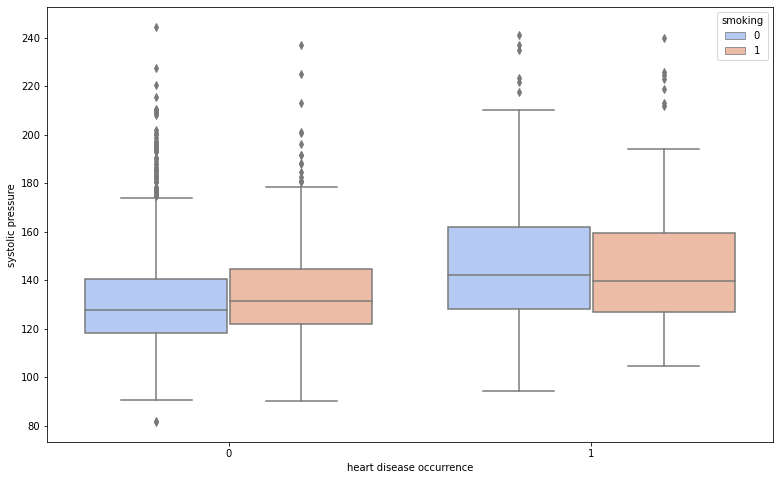

In [59]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='systolic pressure',hue='smoking',data=heart, palette="coolwarm")

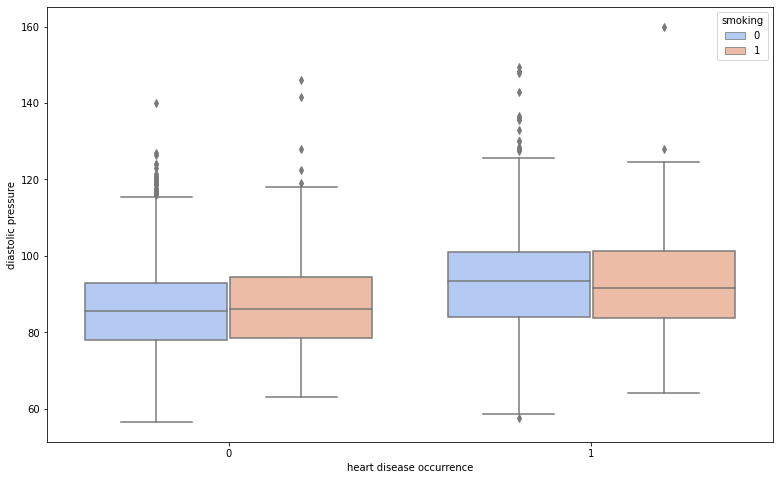

In [60]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='diastolic pressure',hue='smoking',data=heart, palette="coolwarm")

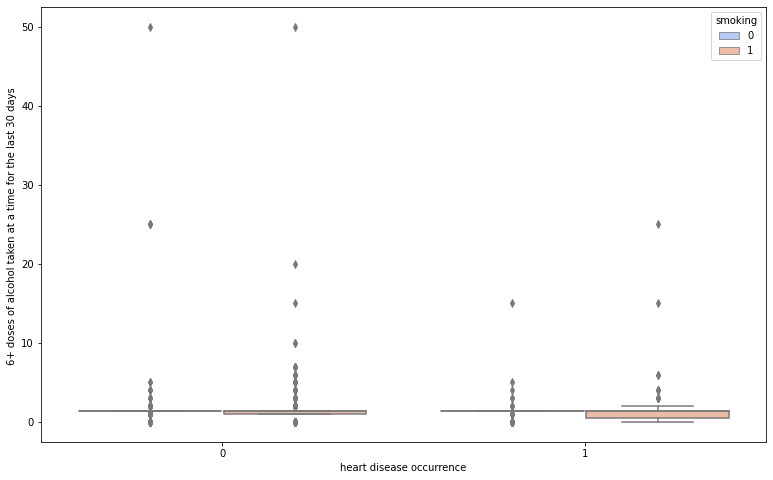

In [61]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='6+ doses of alcohol taken at a time for the last 30 days ',hue='smoking',data=heart, palette="coolwarm")

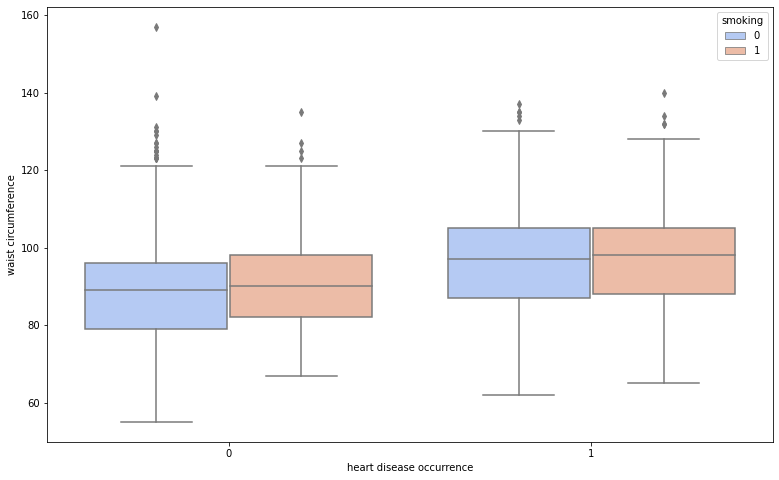

In [62]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='waist circumference',hue='smoking',data=heart, palette="coolwarm")

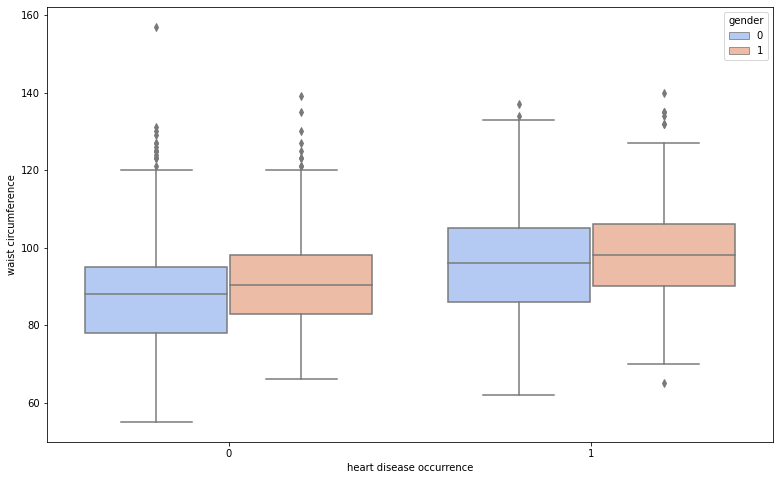

In [63]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='waist circumference',hue='gender',data=heart, palette="coolwarm")

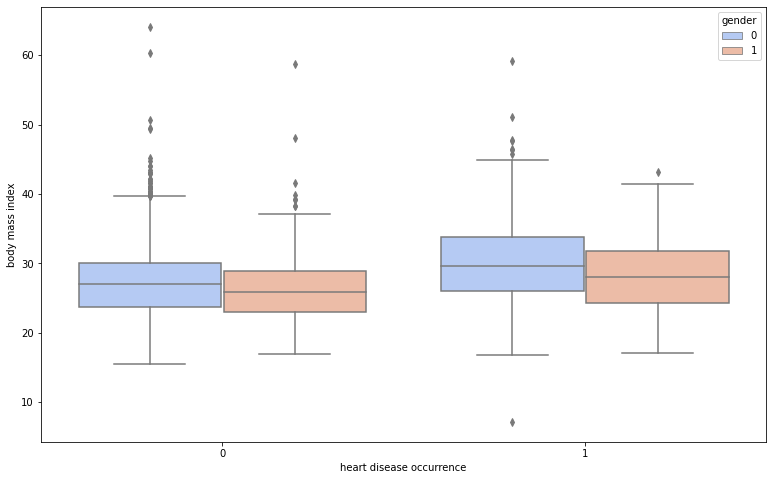

In [64]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='body mass index',hue='gender',data=heart, palette="coolwarm")

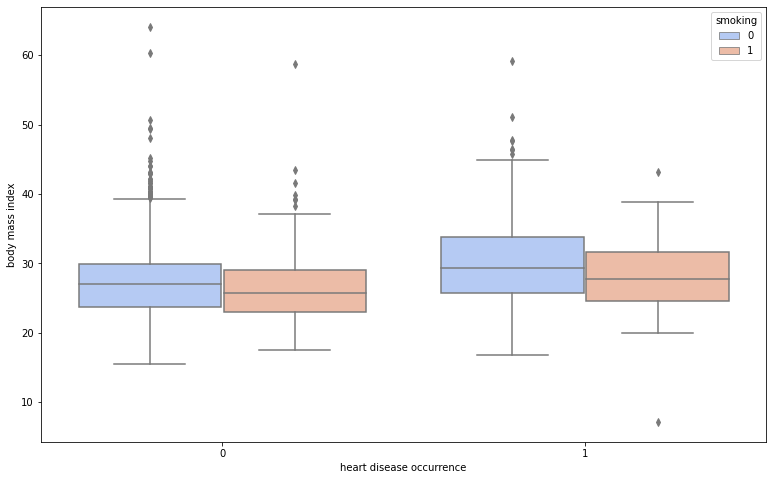

In [65]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='body mass index',hue='smoking',data=heart, palette="coolwarm")

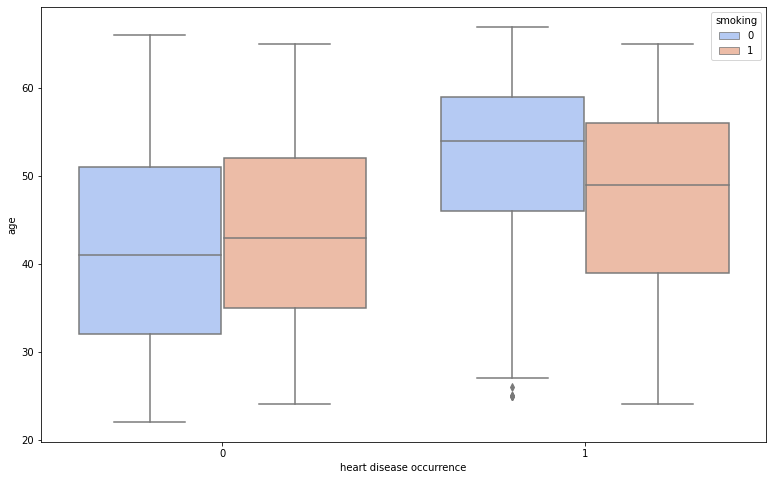

In [66]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='age',hue='smoking',data=heart, palette="coolwarm")

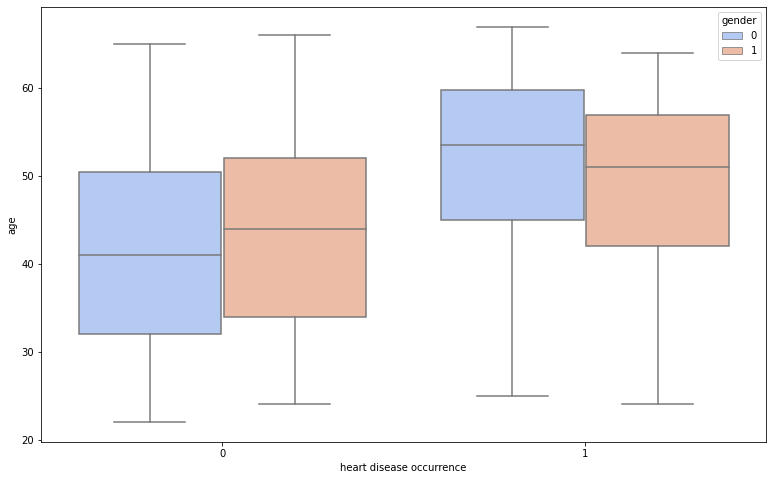

In [67]:
fig, ax = plt.subplots(figsize=(13,8))
sns.boxplot(x="heart disease occurrence", y='age',hue='gender',data=heart, palette="coolwarm")

Interesting thing was that out of people with heart disease those who smoke have a less systolic pressure than those who don't smoke. It is probably just a special case of this dataset. Another thing is that portions of fruit and vegetables and alcohol doses don't necessarily influence anything. Also people with more body mass index have more heart issues than others, as well as people of older age which is understandable.

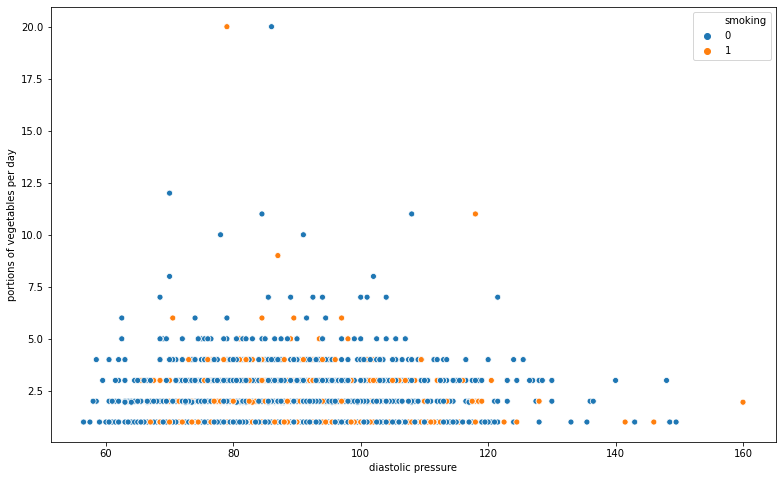

In [68]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['diastolic pressure'],heart['portions of vegetables per day'],hue=heart['smoking'])

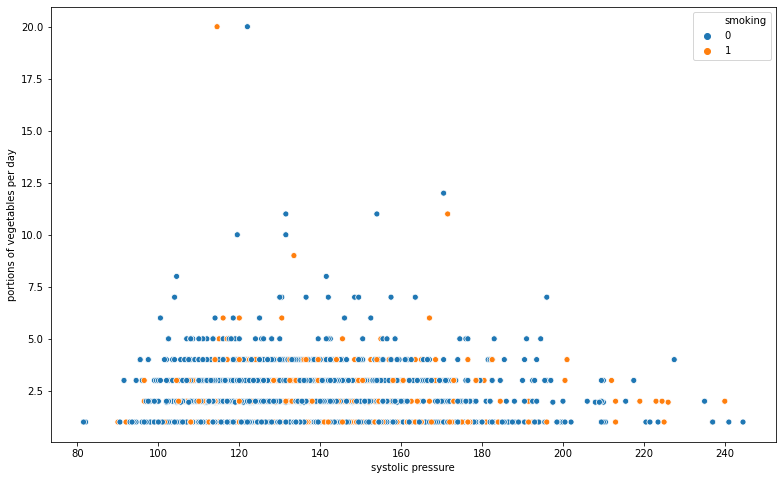

In [69]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['systolic pressure'],heart['portions of vegetables per day'],hue=heart['smoking'])

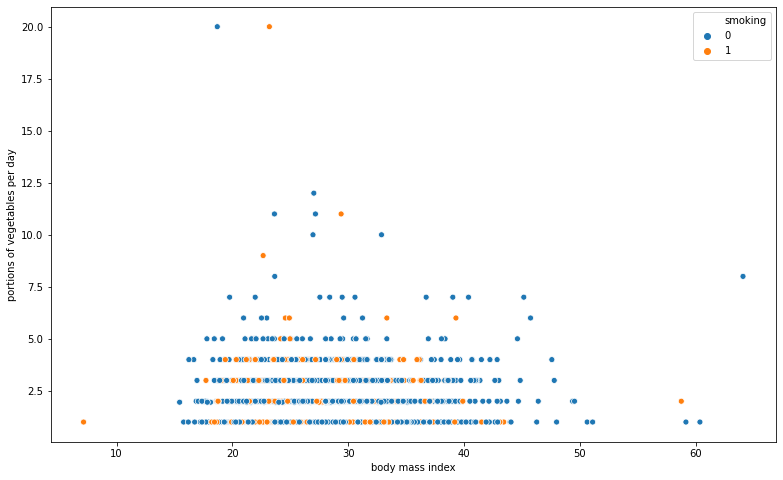

In [70]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['portions of vegetables per day'],hue=heart['smoking'])

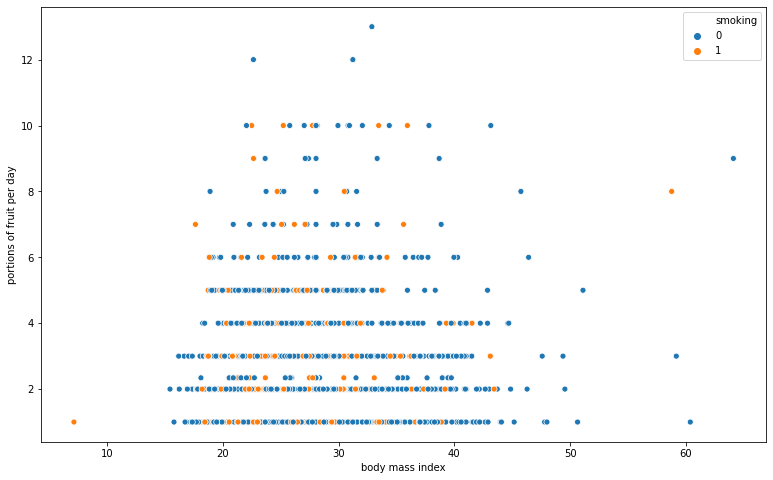

In [71]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['portions of fruit per day'],hue=heart['smoking'])

I think we can get the idea that fruit or vegetable consumption doesn't correlate much with anything. 

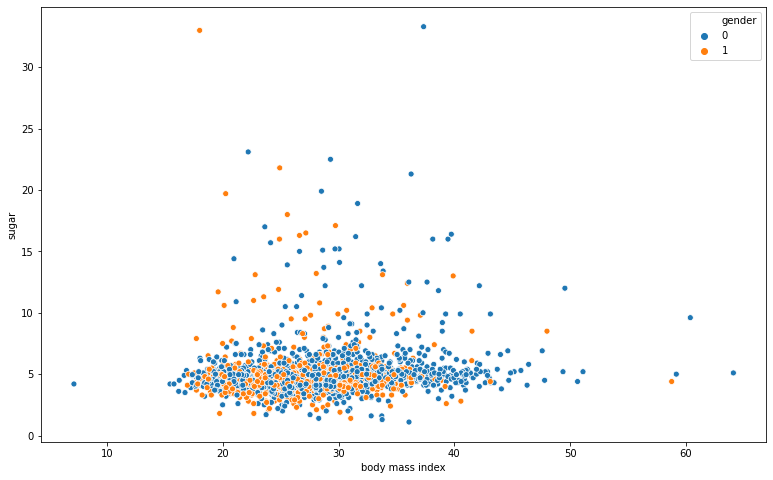

In [72]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['sugar'],hue=heart['gender'])

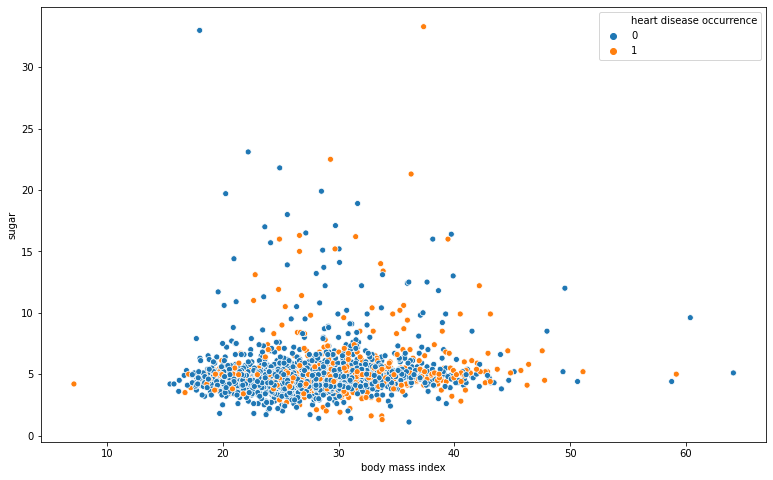

In [73]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['sugar'],hue=heart['heart disease occurrence'])

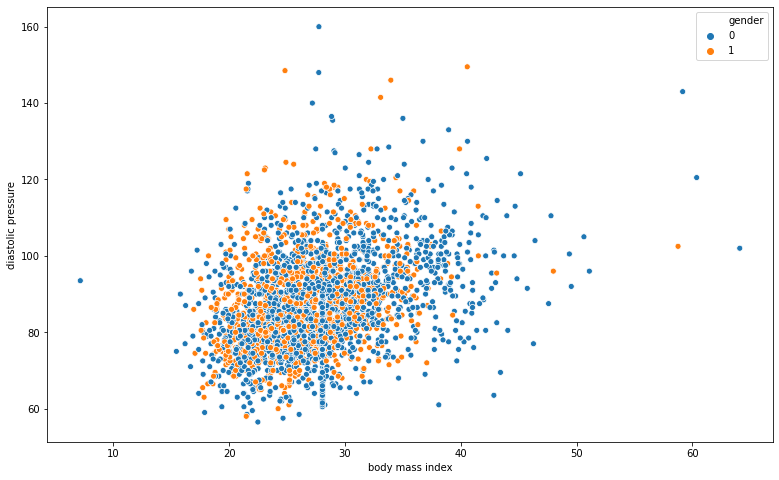

In [74]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['diastolic pressure'],hue=heart['gender'])

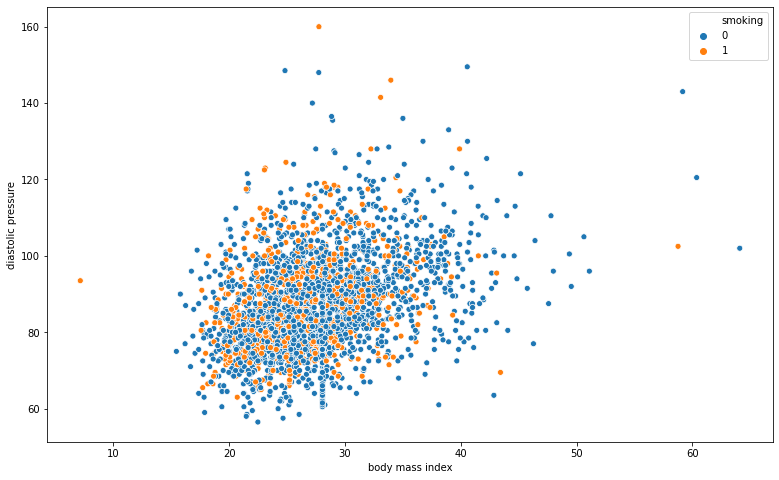

In [75]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['diastolic pressure'],hue=heart['smoking'])

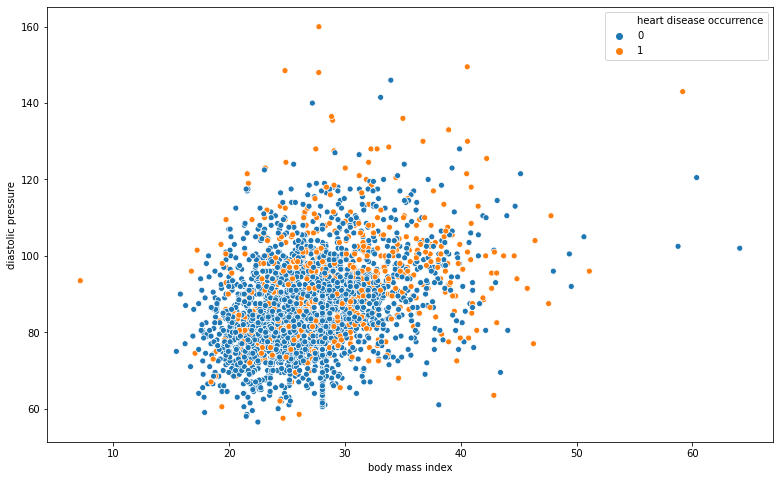

In [76]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['diastolic pressure'],hue=heart['heart disease occurrence'])

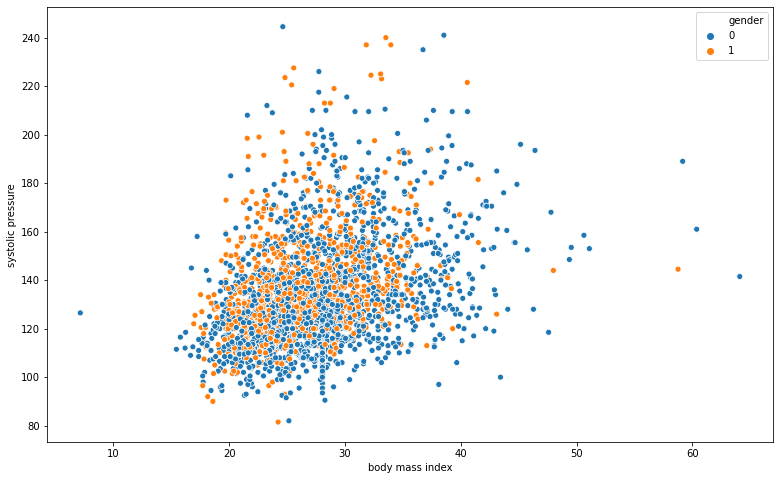

In [77]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['systolic pressure'],hue=heart['gender'])

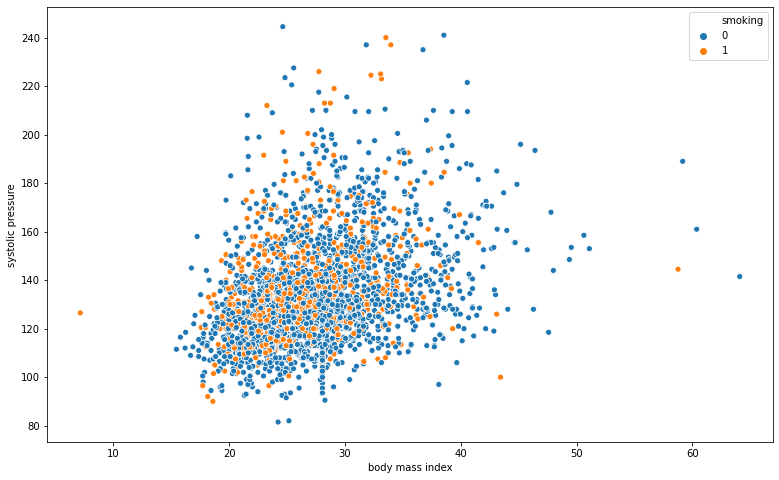

In [78]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['systolic pressure'],hue=heart['smoking'])

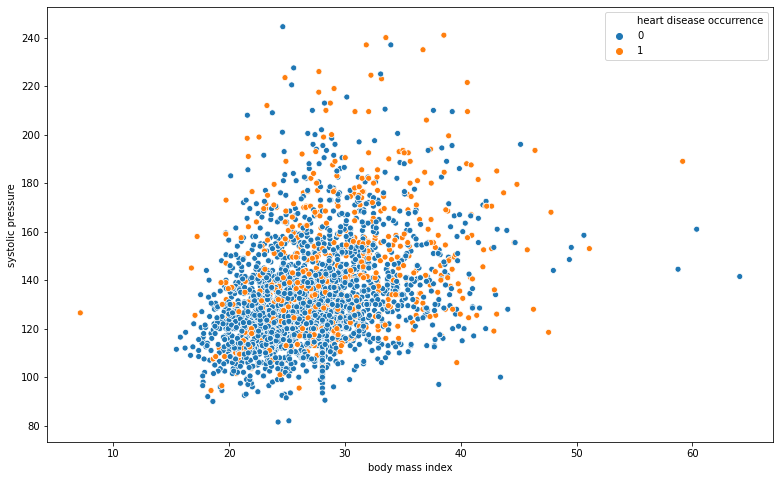

In [79]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['systolic pressure'],hue=heart['heart disease occurrence'])

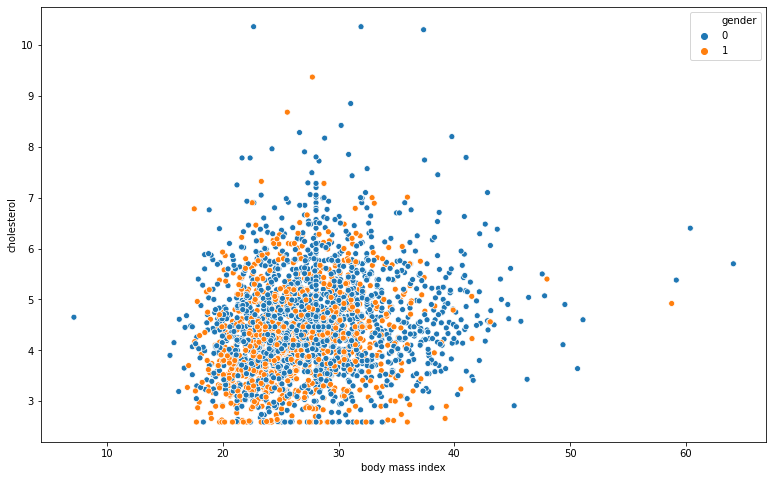

In [80]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['cholesterol'],hue=heart['gender'])

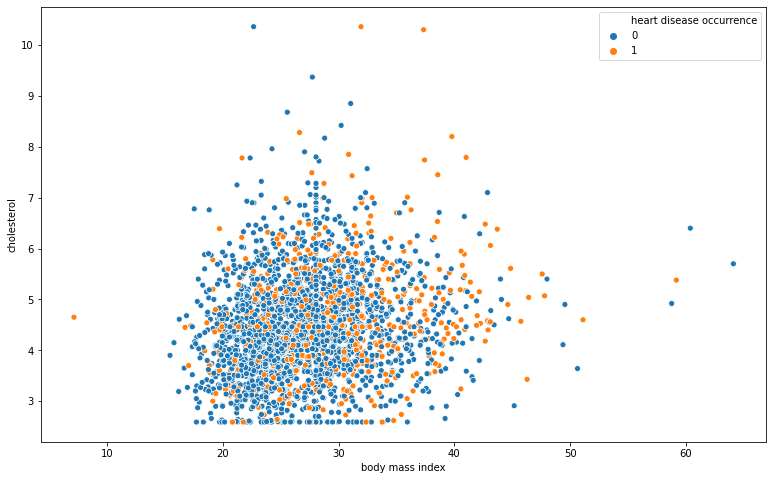

In [81]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['body mass index'],heart['cholesterol'],hue=heart['heart disease occurrence'])

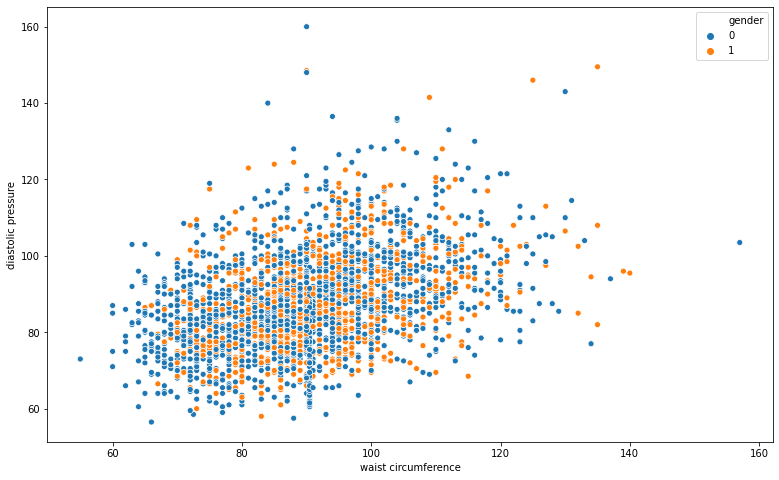

In [82]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['diastolic pressure'],hue=heart['gender'])

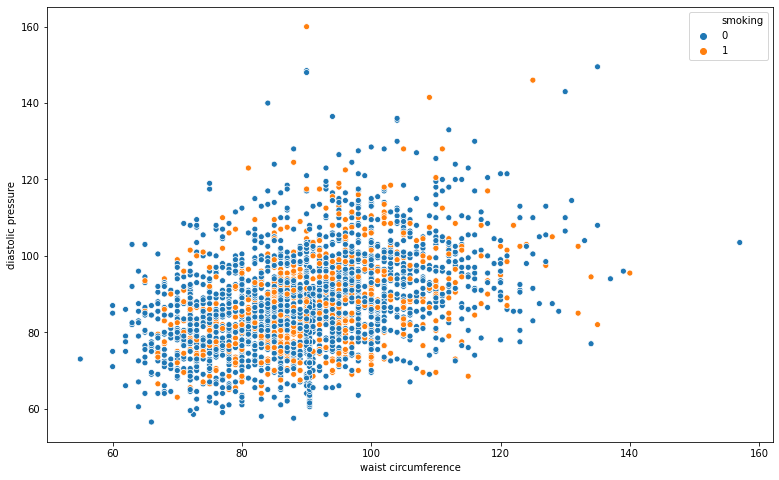

In [83]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['diastolic pressure'],hue=heart['smoking'])

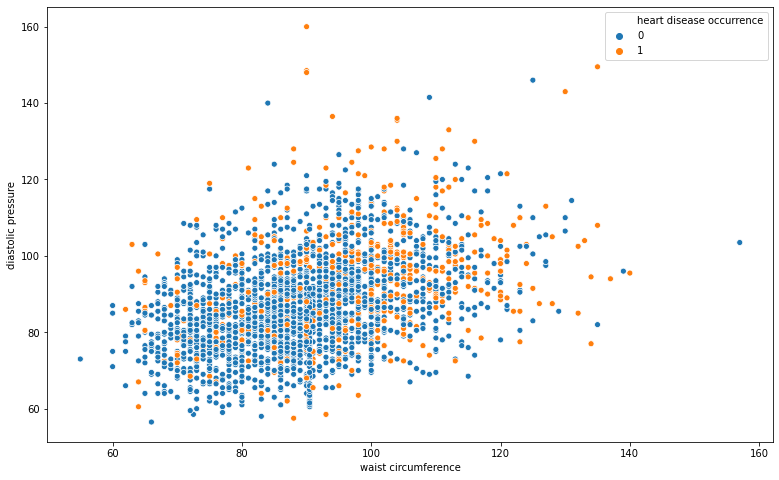

In [84]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['diastolic pressure'],hue=heart['heart disease occurrence'])

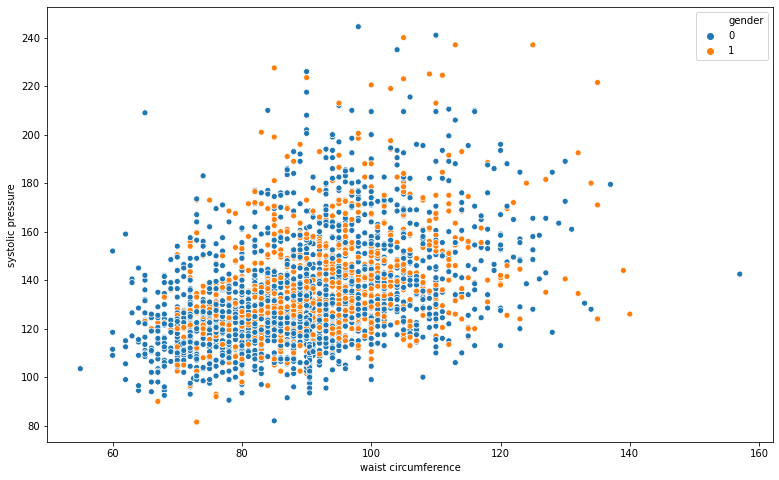

In [85]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['systolic pressure'],hue=heart['gender'])

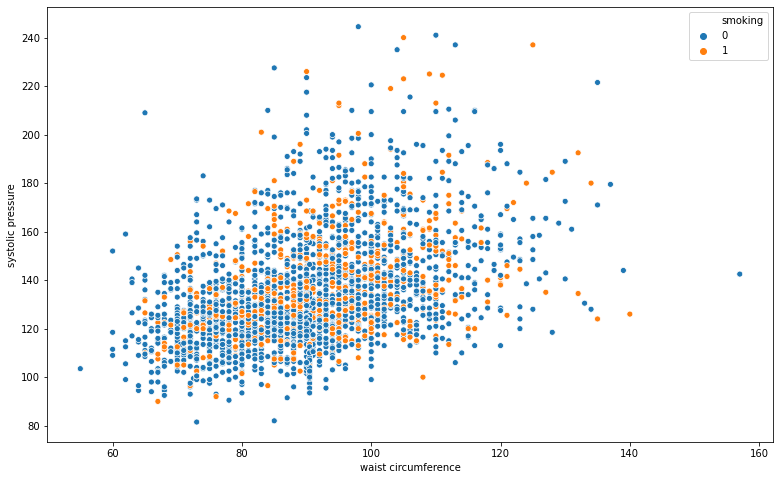

In [86]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['systolic pressure'],hue=heart['smoking'])

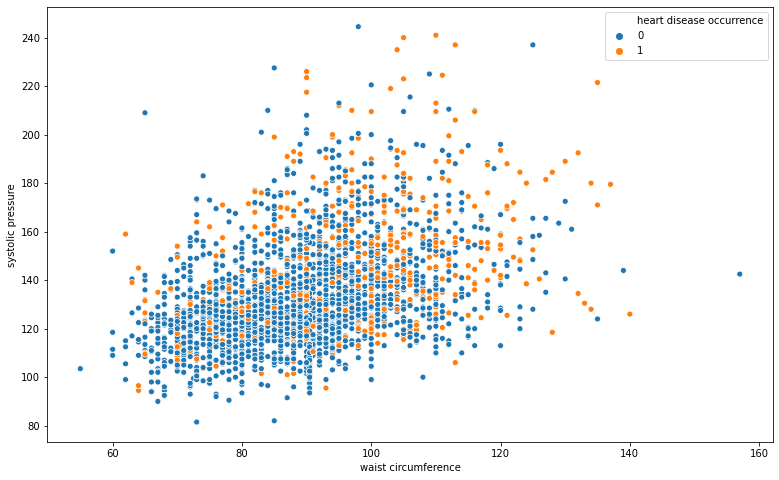

In [87]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['systolic pressure'],hue=heart['heart disease occurrence'])

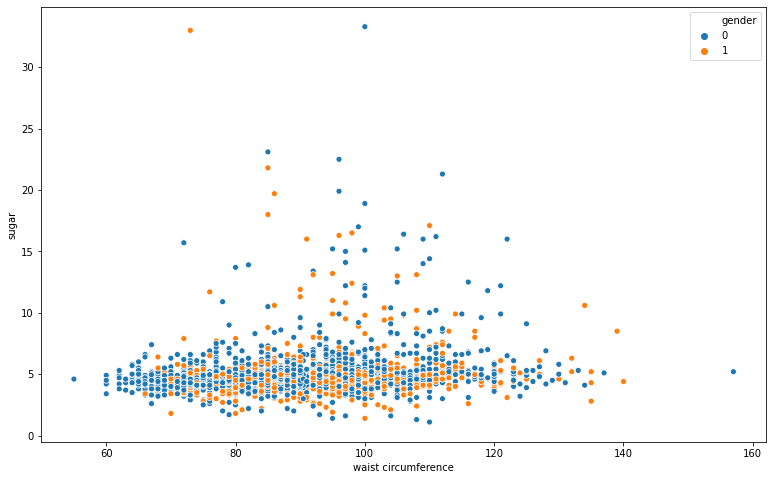

In [88]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['sugar'],hue=heart['gender'])

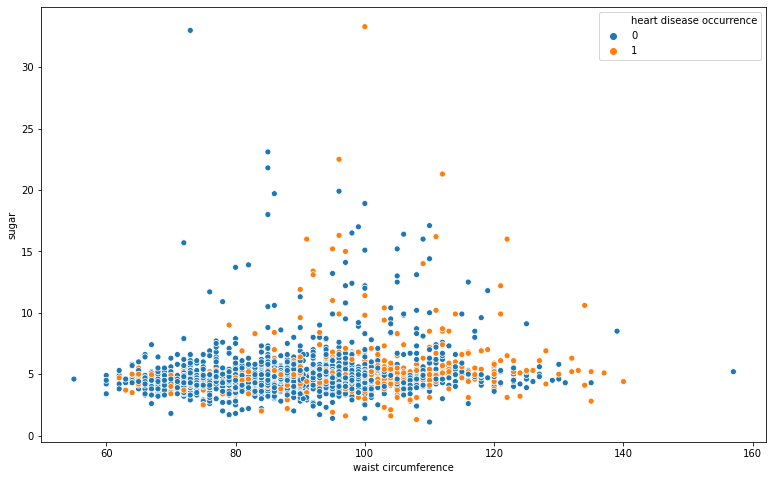

In [89]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['sugar'],hue=heart['heart disease occurrence'])

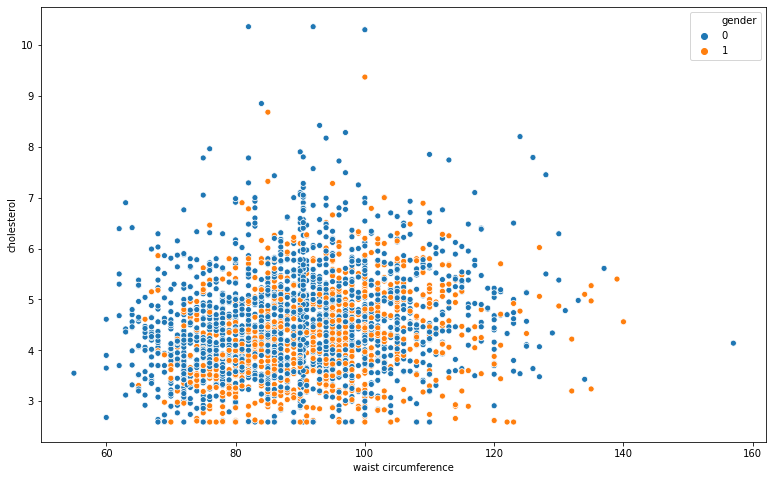

In [90]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['cholesterol'],hue=heart['gender'])

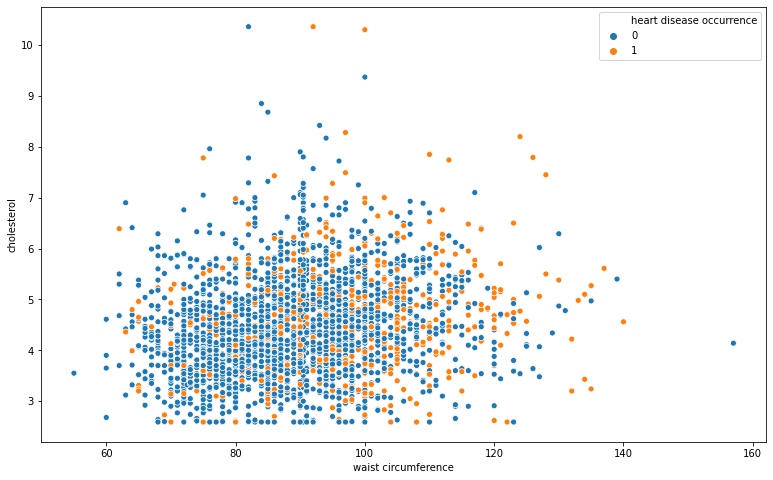

In [91]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['waist circumference'],heart['cholesterol'],hue=heart['heart disease occurrence'])

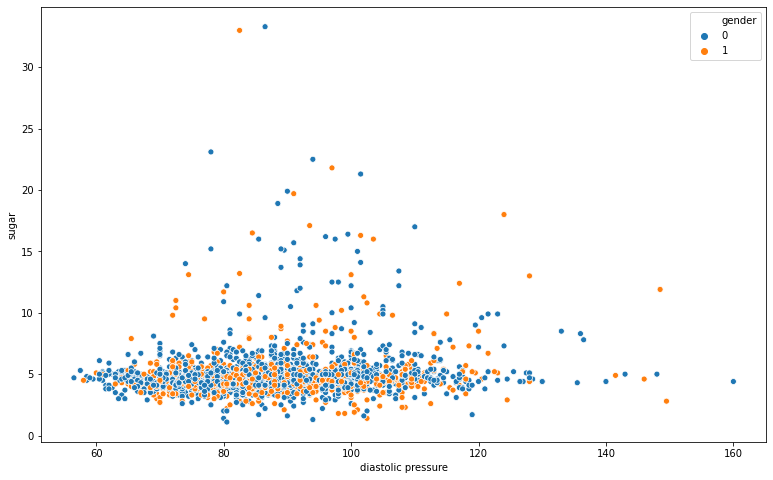

In [92]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['diastolic pressure'],heart['sugar'],hue=heart['gender'])

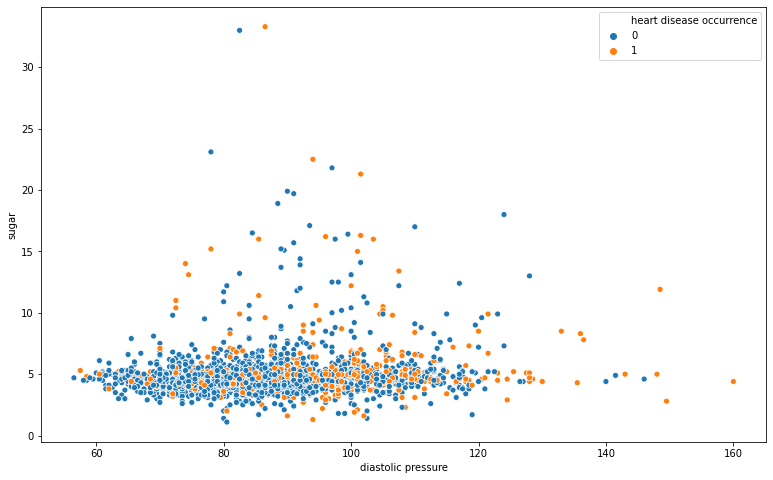

In [93]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['diastolic pressure'],heart['sugar'],hue=heart['heart disease occurrence'])

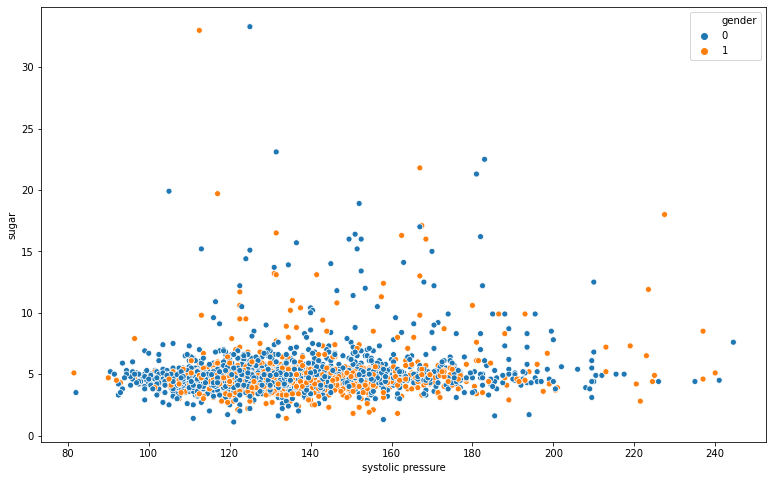

In [94]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['systolic pressure'],heart['sugar'],hue=heart['gender'])

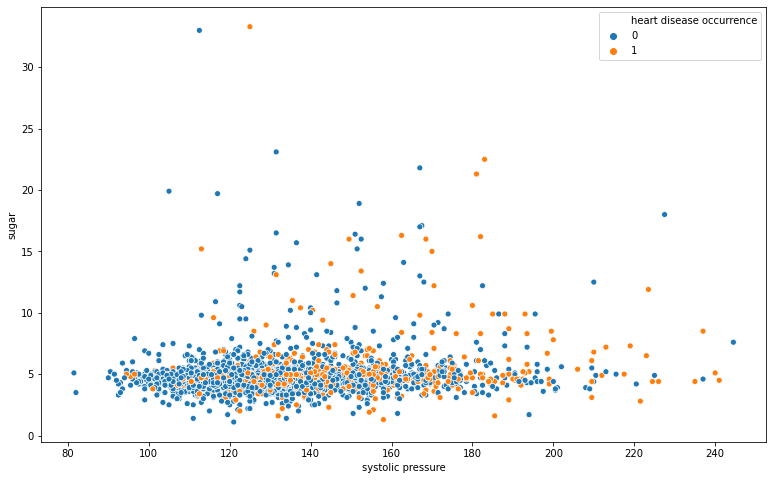

In [95]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['systolic pressure'],heart['sugar'],hue=heart['heart disease occurrence'])

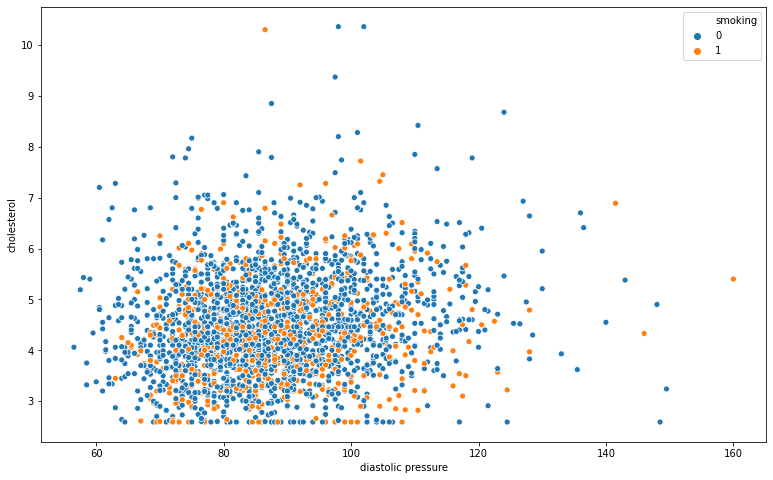

In [96]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['diastolic pressure'],heart['cholesterol'],hue=heart['smoking'])

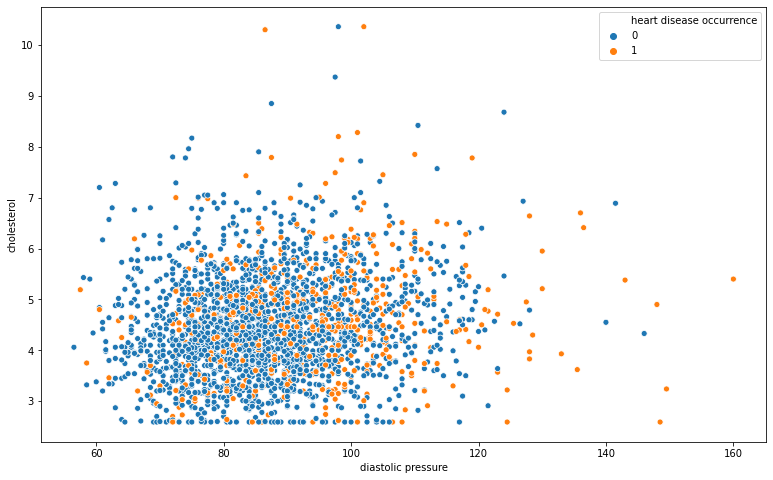

In [97]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['diastolic pressure'],heart['cholesterol'],hue=heart['heart disease occurrence'])

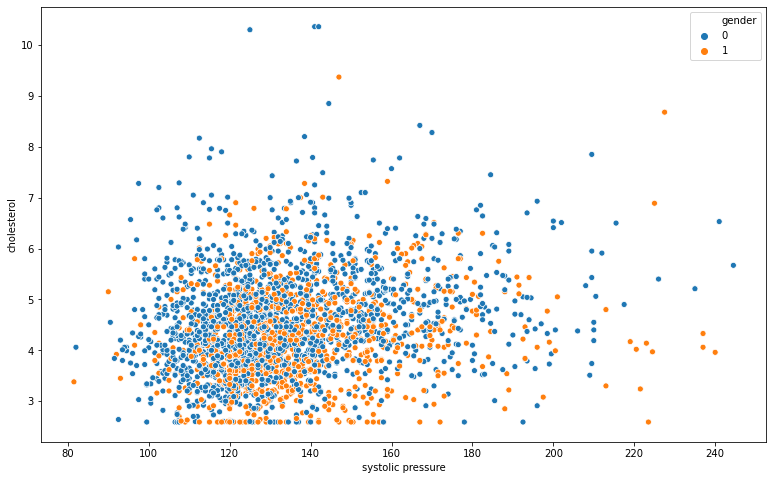

In [98]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['systolic pressure'],heart['cholesterol'],hue=heart['gender'])

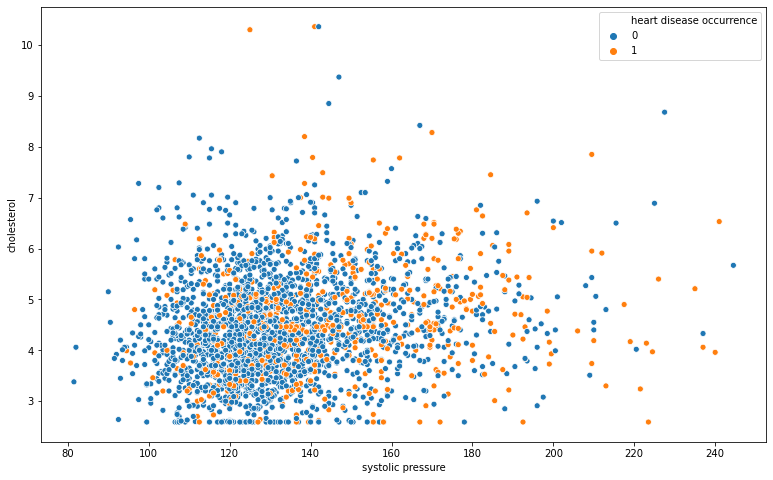

In [99]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(heart['systolic pressure'],heart['cholesterol'],hue=heart['heart disease occurrence'])

Seems like sugar also doesn't correlate much with other features.Cholesterol on other hand shows a bigger correlation. We can check it all using heatmap plot.

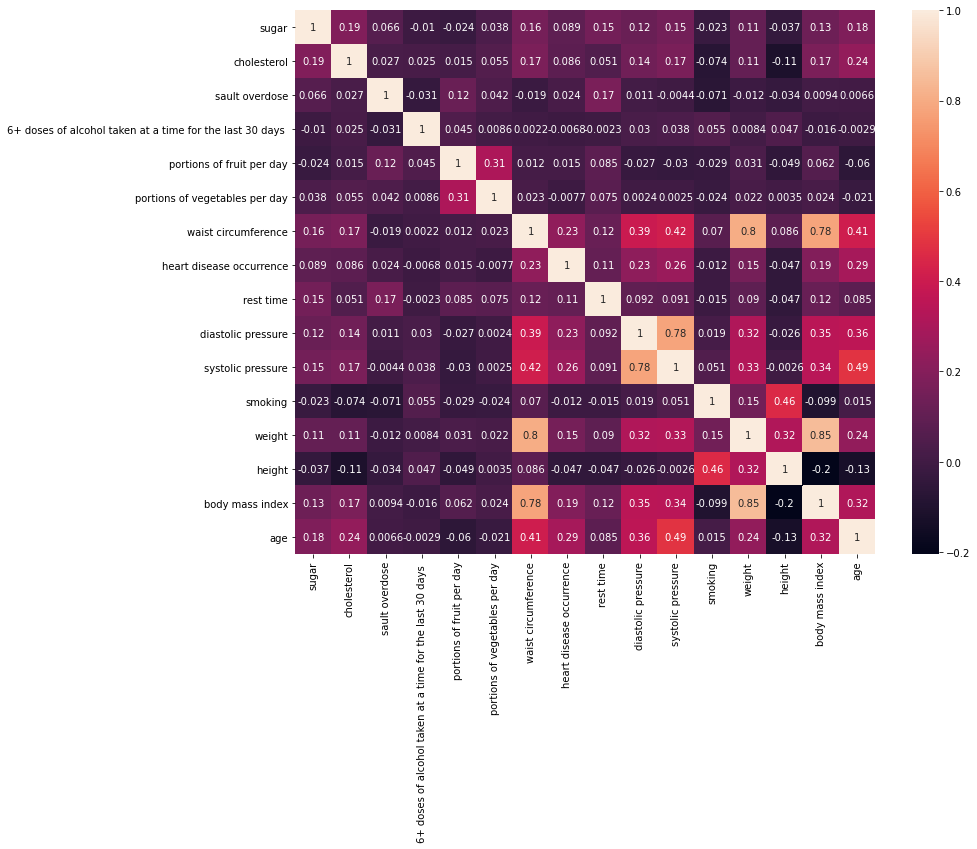

In [100]:
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(heart.drop(['birth year','gender'],axis=1).corr(),annot=True)

If we look at heart disease ocurrence correlation we can see the most correlation with pressure measurements, waist circumference and age which is understandable. All these have a bigger than 0.2 correlation value which is considered moderate.

Now let's do machine learning. I decided to test Logistic Regression, KNN and Random Forest models. I am going to sample the data for training slice of dataset because the dataset is unbalanced and sampling can improve learning process.


In [101]:
train_df = heart[:int(len(heart)*0.7)]
class_0 = train_df[train_df['heart disease occurrence'] == 0]
class_1 = train_df[train_df['heart disease occurrence'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)

X_train=train_df.drop(['heart disease occurrence','birth year'],axis=1)

y_train=train_df['heart disease occurrence']

val_df = heart[int(len(heart)*0.7):]

X_test=val_df.drop(['heart disease occurrence','birth year'],axis=1)


y_test=val_df['heart disease occurrence']


rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)



logmodel=LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)
pred_log=logmodel.predict(X_test)

knn=KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)

print('Random Forest')
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

print('KNN')
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

print('Logistic')
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

Random Forest
[[564  24]
 [181  33]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       588
           1       0.58      0.15      0.24       214

    accuracy                           0.74       802
   macro avg       0.67      0.56      0.54       802
weighted avg       0.71      0.74      0.69       802

KNN
[[430 158]
 [ 98 116]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       588
           1       0.42      0.54      0.48       214

    accuracy                           0.68       802
   macro avg       0.62      0.64      0.62       802
weighted avg       0.71      0.68      0.69       802

Logistic
[[423 165]
 [ 84 130]]
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       588
           1       0.44      0.61      0.51       214

    accuracy                           0.69       802
   macro avg       0.64      0.6

We can look for better number of neighbors for KNN model and see the result.

Text(0, 0.5, 'Error Rate')

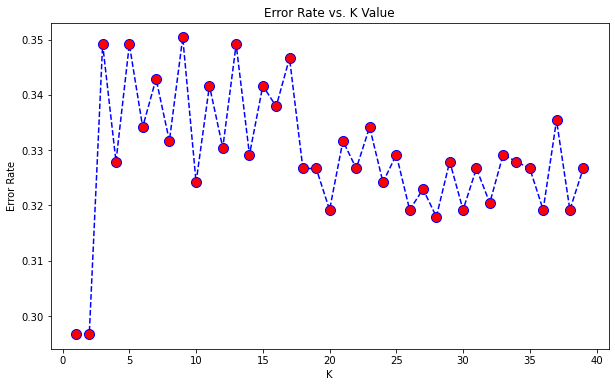

In [102]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')    

In [103]:
train_df = heart[:int(len(heart)*0.7)]
class_0 = train_df[train_df['heart disease occurrence'] == 0]
class_1 = train_df[train_df['heart disease occurrence'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)

X_train=train_df.drop(['heart disease occurrence','birth year'],axis=1)

y_train=train_df['heart disease occurrence']

val_df = heart[int(len(heart)*0.7):]

X_test=val_df.drop(['heart disease occurrence','birth year'],axis=1)


y_test=val_df['heart disease occurrence']


rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)



logmodel=LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)
pred_log=logmodel.predict(X_test)

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)

print('Random Forest')
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

print('KNN')
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

print('Logistic')
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

Random Forest
[[563  25]
 [176  38]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       588
           1       0.60      0.18      0.27       214

    accuracy                           0.75       802
   macro avg       0.68      0.57      0.56       802
weighted avg       0.72      0.75      0.70       802

KNN
[[505  83]
 [153  61]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       588
           1       0.42      0.29      0.34       214

    accuracy                           0.71       802
   macro avg       0.60      0.57      0.58       802
weighted avg       0.68      0.71      0.69       802

Logistic
[[416 172]
 [ 84 130]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       588
           1       0.43      0.61      0.50       214

    accuracy                           0.68       802
   macro avg       0.63      0.6

KNN model learnt better how to classify people who don't have a heart disease. Overall I would choose Logistic model over other models because it has the least amount of people (84) that actually have a heart disease but were classified by model as healthy. I think in case of heart disease occurrence we should care more about this rather than about how many people were labeled sick while being healthy.